In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import symbol_to_path, get_data, get_bollinger_bands, \
    daily_returns, plot_rolling, cumulative_returns, plot_data

          Date   Open       High        Low      Close  Adj Close   Volume
18  2017-08-03  29.58  30.070000  29.450001  30.030001  30.030001  2967200
19  2017-08-04  29.91  30.000000  29.620001  29.850000  29.850000  2142900
20  2017-08-07  29.82  29.900000  29.430000  29.559999  29.559999  3501000
21  2017-08-08  29.41  29.629999  29.250000  29.610001  29.610001  4181100
22  2017-08-09  29.67  29.770000  29.370001  29.379999  29.379999  2882000
Volumee mean: 3487956.52174


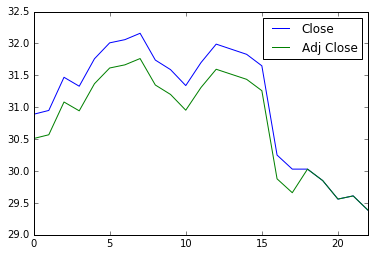

In [8]:
def test_run(symbol):
    df = pd.read_csv("data/%s.csv" %symbol)
    print df.tail(5)
    print 'Volumee mean:', df['Volume'].mean()
    df[['Close', 'Adj Close']].plot()
    plt.show()
     
test_run('HCP')

In [348]:
dates = pd.date_range('2010-01-11', '2010-03-26')
symbols = ['SPY', 'GOOG', 'IBM', 'GLD']
df = get_data(symbols, dates)
#df

In [137]:
# slicing
print df.ix['2010-01-15':'2010-01-25', ['IBM', 'GLD']]

               IBM     GLD
2010-01-15  125.60  110.86
2010-01-19  127.85  111.52
2010-01-20  124.14  108.94
2010-01-21  122.95  107.37
2010-01-22  119.61  107.17
2010-01-25  120.20  107.48


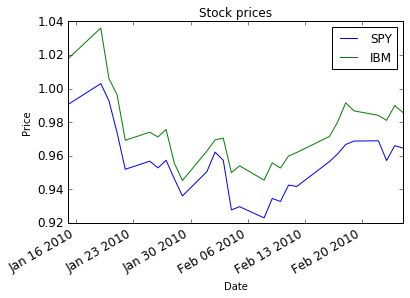

In [338]:
columns = ['SPY', 'IBM']
plot_selected(normalize(df), columns, '2010-01-15', '2010-02-25')

In [187]:
import numpy as np

In [191]:
# intial values
np.empty((5,2))
np.ones((2,3), dtype=np.int_)

array([[ 339.87033542,  227.58333025],
       [ 405.07033542,  227.58333025],
       [ 405.07033542,  269.18333025],
       [ 339.87033542,  269.18333025],
       [ 339.87033542,  227.58333025]])

In [199]:
np.random.random((3,2))

array([[ 0.49108489,  0.93232753],
       [ 0.793605  ,  0.85560416],
       [ 0.67357073,  0.79877798]])

In [202]:
np.random.randint(0, 10, size=5)

array([5, 0, 7, 9, 1])

In [215]:
def test_run(a):    
    print "Array:", a
    print "Maximum value:", a.max()
    print "Index of max.:", a.argmax()
a = np.array([9, 6, 2, 3, 12, 14, 7, 10], dtype=np.int32)  # 32-bit integer array
test_run(a)

Array: [ 9  6  2  3 12 14  7 10]
Maximum value: 14
Index of max.: 5


In [216]:
# indexing
indexs= [1,2,4]
a[indexs]

array([ 6,  2, 12], dtype=int32)

In [219]:
# masking
mean = a.mean()
a[a<mean]

array([6, 2, 3, 7], dtype=int32)

### rolling-mean, std, find sell/buy point, moving window

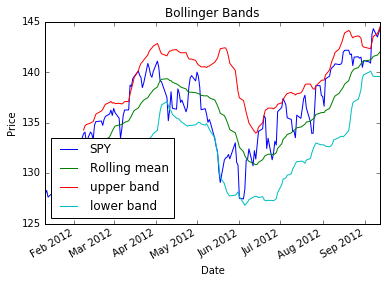

In [703]:
dates = pd.date_range('2012-01-11', '2012-12-26')
symbols = ['SPY']
df = get_data(symbols, dates)

plot_rolling(df, 'SPY')

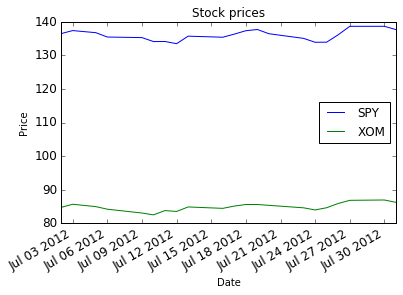

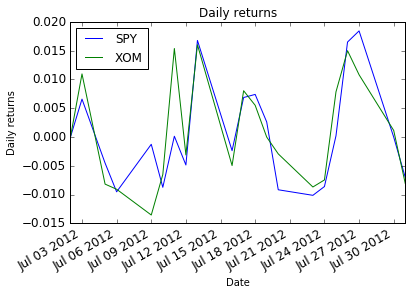

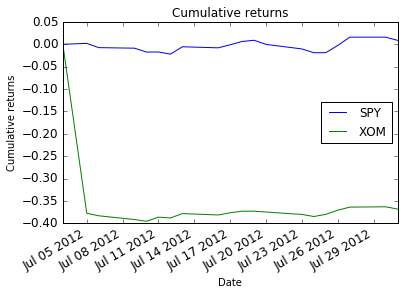

In [433]:
def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    df_day = daily_returns(df)
    plot_data(df_day, title="Daily returns", ylabel="Daily returns")
    
    df_cum = cumulative_returns(df)
    plot_data(df_cum, title="Cumulative returns", ylabel="Cumulative returns")
    
if __name__ == "__main__":
    test_run()


## missing data

In [413]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

0.000793786274069 0.00808861364576


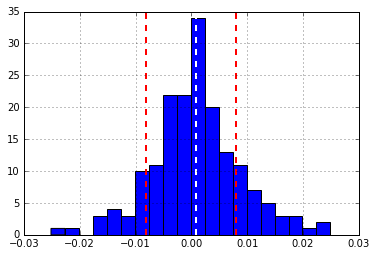

In [706]:
def plot_hist(df):
    df.hist(bins=20)

    mean = df.mean()
    std = df.std()
    print mean, std
    plt.axvline(mean, color = 'w', linestyle='dashed', linewidth=2)
    plt.axvline(std, color = 'r', linestyle='dashed', linewidth=2)
    plt.axvline(-std, color = 'r', linestyle='dashed', linewidth=2)
    plt.show()

dates = pd.date_range('2012-01-01', '2012-12-31')  # one month only
symbols = ['SPY','XOM']
df = get_data(symbols, dates)
plot_hist(daily_returns(df['SPY']))

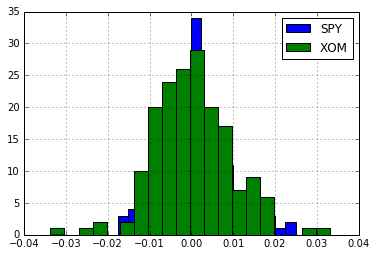

In [440]:
df_day = daily_returns(df)
df_day['SPY'].hist(bins=20, label='SPY')
df_day['XOM'].hist(bins=20, label='XOM')
plt.legend(loc='best')
plt.show()

## beta and correlation
y = b x + a

0.880831528594 -0.000319080228049
0.241591732131 0.000281471589111


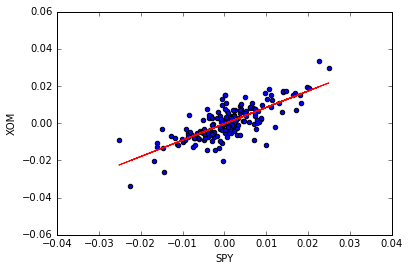

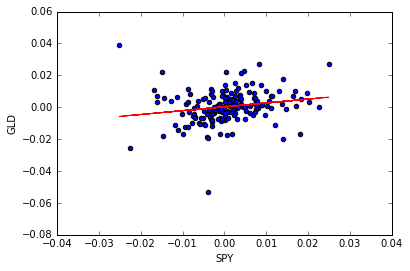

In [813]:

dates = pd.date_range('2012-01-01', '2012-12-31')  # one month only
symbols = ['SPY','XOM', 'GLD']
df = get_data(symbols, dates)

df_day = daily_returns(df)
for symbol in symbols[1:]:
    plot_beta(df_day, symbols[0], symbol)
plt.show()

## portfolio

### Sharp ratio: reward by risk
$$SR = \frac{E[R_p - R_f]}{std[R_p - Rf]} = \frac{mean(\text{daily_rets} - \text{daily_rf})}{std(\text{daily_rets})}$$
where $R_p$: daily returns
      $R_f$: risk free rate
      
$$SR_{annualized} = K * SR $$
where $K=\sqrt{\text{#samples per year}}$ 
for year: $\sqrt{252}$

In [455]:
252** 0.5 * 0.8

12.699606293110037

## Optimizer

In [458]:
import scipy.optimize as spo

In [463]:
def f(x):
    y = (x - 1.5) ** 2 + 0.5
    print "x={}, y={}".format(x,y)
    return y
    
def test():
    Xguess = 2.0
    min_res = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})

test()

x=[ 2.], y=[ 0.75]
x=[ 2.], y=[ 0.75]
x=[ 2.00000001], y=[ 0.75000001]
x=[ 0.99999999], y=[ 0.75000001]
x=[ 1.5], y=[ 0.5]
x=[ 1.5], y=[ 0.5]
x=[ 1.50000001], y=[ 0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2


In [487]:
# convext problems

def err_poly(C, data):
    """
    C: numpy.poly1d object or equivalent array representing polynomail coeeficients
    data: 2D aaray where each row is a point(x,y)
    returns:
        error as a single real value.
    """
    return np.sum((data[:,1] - np.polyval(C, data[:, 0])) ** 2)
                  
def fit_poly(data, error_func, degree=3):
    # generate inital guess for polynomial model( all coeffs = 1)
    Cguess = np.poly1d(np.ones(degree+1, dtype=np.float32))
    
    # plot initial guess(optional)
    x = np.linespace(-5,5,21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label = "inital guess")
    
    # call optimizer
    res = spo.minimize(error_func, Cguess, args = (data,), 
                       method = 'SLSQP')
    return np.poly1d(res.x)
#fit_poly()

## optimize proforlios


In [ ]:
# ranges and constraints

## types of funds
* ETF(3~4 letters)
* mutual fund(5 letters)
* hedge fund

### what is in an order?
* buy or sell
* symbol
* shares
* limit or market
* price

### the order book

### geographic arbitrage

### broker
* stop loss（止损）
* stop gain（止盈）
* trailing stop(随股票上涨，自动调整止损价）
* sell short（卖空）
* exit（还券）

## value of a future dollar
$$ PV = \frac{FV}{1+ IR^i} $$
where PV: present value, FV: future value, IR: interest rate
## intrinsic value
$$\sum_{i=1}^\infty \frac{FV}{n^i} = \frac{FV}{n-1} = \frac{FV}{DR}$$
where n=(1+IR), DR: discount rate
## book value
assets - load liability, without brand name vlaue

##  CAPM 
Capital Asset pricing Model



$$r_p(t) = \sum_i w_i \big(\beta_i r_M(t) + \alpha_i(t)\big) $$
where $E(\alpha) = 0 $
     
$\alpha_i$ : prediction of a stock

$r_M$: market return

* choose large $\beta$ for up market
* choose smaller $\beta$ for down market

### APT(Arbitrage Pricing Thery)
tech finance mfg $\beta$

## hedge fund

let $ \sum w_i \beta_i = 0 $, so that $r_M$ doesn't matter

with condition $\sum abs(w_i) = 1$

## technical factors
elements:
* price
* volumn

major factors:
* momentum
* smple moving average(SMA)
* Bollinger Bands

$$ BB[t] = \frac{price[t] - SMA[t]}{2 * std[t]} $$

* sell: BB > 1.0, and price going down
* buy: BB < -1, and price going up